# Пример использование препроцессора

## Загрузка пакетов

In [1]:
import fmna.dataloader as dataloader
import fmna.preprocessor as preprocessor

## Задание настроек

Настройки задаются как словарь для удобного дальнейшего использования

- path: путь до папки с данными
- pattern: шаблон для данных загрузки из папки (шаблон подпапок path в которых находятся архивы полученные из minian)
- loading_data: список названий загружаемых архивов
- meta: словарь для создания метаинформации (номер названия папки в pattern)
    - session: название сессии
    - animal: название животного
    - Например: если данные загружены из папки <i>..\stress\mouse1\right_after\minian</i>, <i>session=-2</i>, <i>animal=-3</i>, то <i>right_after</i> будет распознано как название сессии, а <i>mouse1</i> - как название животного 
- save_path: путь для сохранения данных после препроцессинга

In [2]:
settings = {
    "path": "..\\stress\\",
    "pattern": r"mouse[0-9]+\\.*\\minian$",
    "loading_data": ['C'],
    "meta": dict(session=-2, animal=-3),
    "save_path" : "..\\stress_preprocessed"
}

## Загрузка данных

In [3]:
data = dataloader.loadMinianData(settings['path'], settings['pattern'], settings['loading_data'], settings['meta'])

## Препроцессинг 

Переводит сигналы (массив C в выводе minian) в pandas.DataFrame

P.S. Вместо запуска через notebook можно запустить сам скрипт из консоли передав json файл для настройки 

In [7]:
signals = preprocessor.preprocessSignals(data, False)

## Сохранение результата

In [5]:
preprocessor.saveSignals(signals, settings['save_path'])

NameError: name 'importpreprocessor' is not defined

<Axes: xlabel='unit_id'>

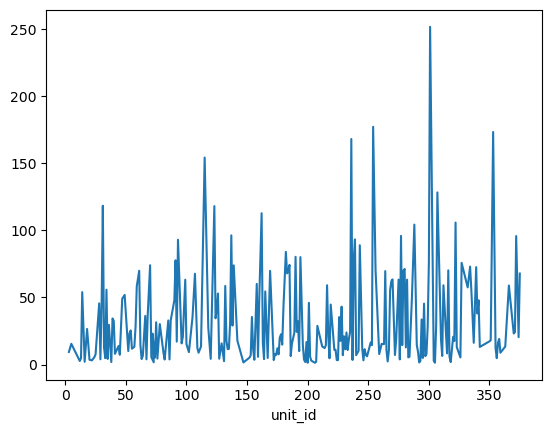

In [34]:
import numpy as np

d = np.log(signals[0][1] + 1)
((-d.mean() + d.max())/d.mean()).plot()



<Axes: >

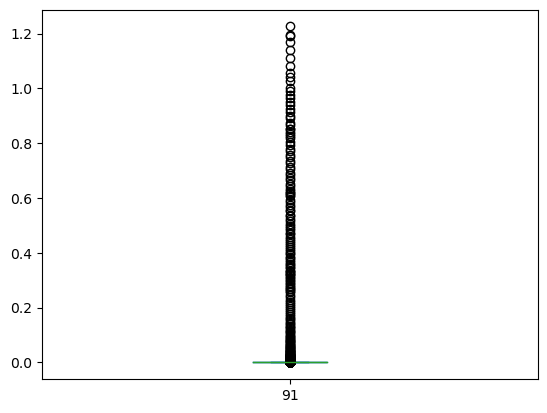

In [48]:
d[91].plot.box()

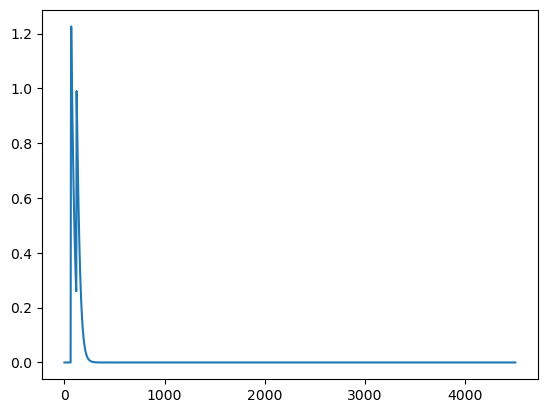

In [49]:
import matplotlib.pyplot as plt

plt.plot((d[91]))


<Axes: ylabel='Frequency'>

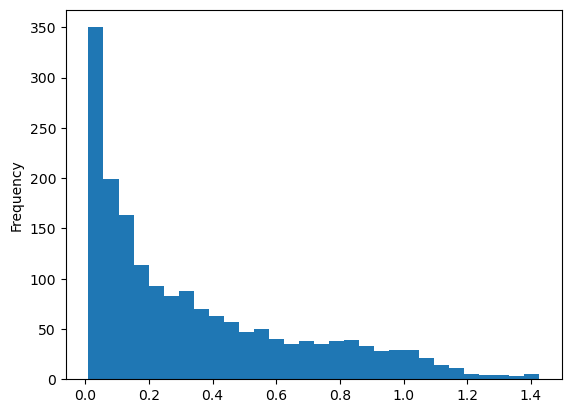

In [45]:
d[3][d[3] > 0.01].plot.hist(bins=30)

<Axes: xlabel='unit_id'>

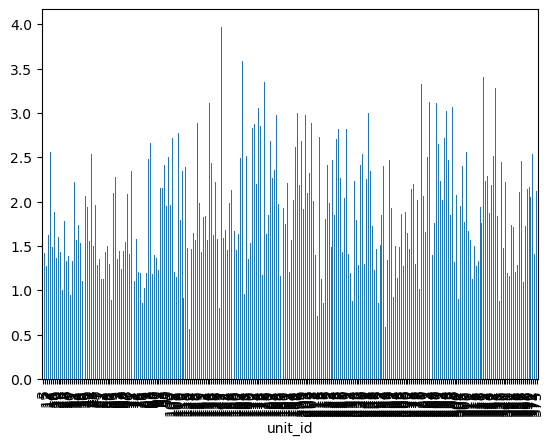

In [50]:
d.max().plot.bar()